# **I bulit the model after pre-processing anf feature selection and copy the result in seprate notebook**

# DeepNetX2:
Input Normalization:

BatchNormalization as the first layer to standardize inputs

Hidden Layers:

5 dense layers with ReLU activation

Layer sizes: 8 → 8 → 16 → 16 → 8 neurons

L2 regularization (λ=1e-4) to prevent overfitting

Dropout layers (20-30%) for regularization

Output Layer:

Softmax activation for multi-class classification

3 output classes (Normal/Prediabetes/Diabetes)

Optimization:

RMSprop optimizer

Categorical cross-entropy loss



In [ ]:
def build_model(input_shape, num_classes):
    model = Sequential([
        BatchNormalization(input_shape=input_shape),
        Dense(8, activation='relu', kernel_regularizer=l2(1e-4)),
        Dropout(0.2),
        Dense(8, activation='relu', kernel_regularizer=l2(1e-4)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(1e-4)),
        Dropout(0.3),
        Dense(16, activation='relu', kernel_regularizer=l2(1e-4)),
        Dropout(0.3),
        Dense(8, activation='relu', kernel_regularizer=l2(1e-4)),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=RMSprop(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model


In [ ]:

def train_model(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
    callbacks = [
        TensorBoard(log_dir='./logs'),
        ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
    ]

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1
    )

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return history

In [ ]:
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    print(f"Test Accuracy: {accuracy*100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=['Negative', 'Positive']))

    # confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test[:, 1], y_pred[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy


In [ ]:
data_path = "diabetes.csv"
class_names = ['Negative', 'Positive']

data, feature_names = load_data(data_path)

cleaned_data = clean_data(data)

<ipython-input-74-db253442fca7>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


Class 0: 217
Class 1: 115


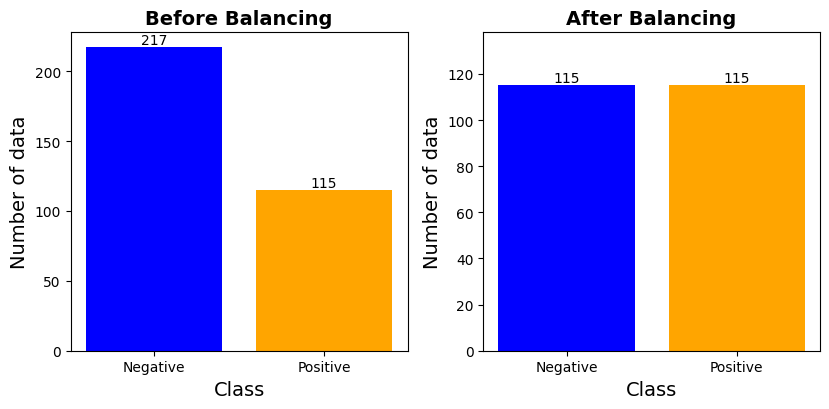

In [ ]:
check_class_balance(cleaned_data)
balanced_data = balance_data(cleaned_data)
visualize_data_distribution(cleaned_data, balanced_data)

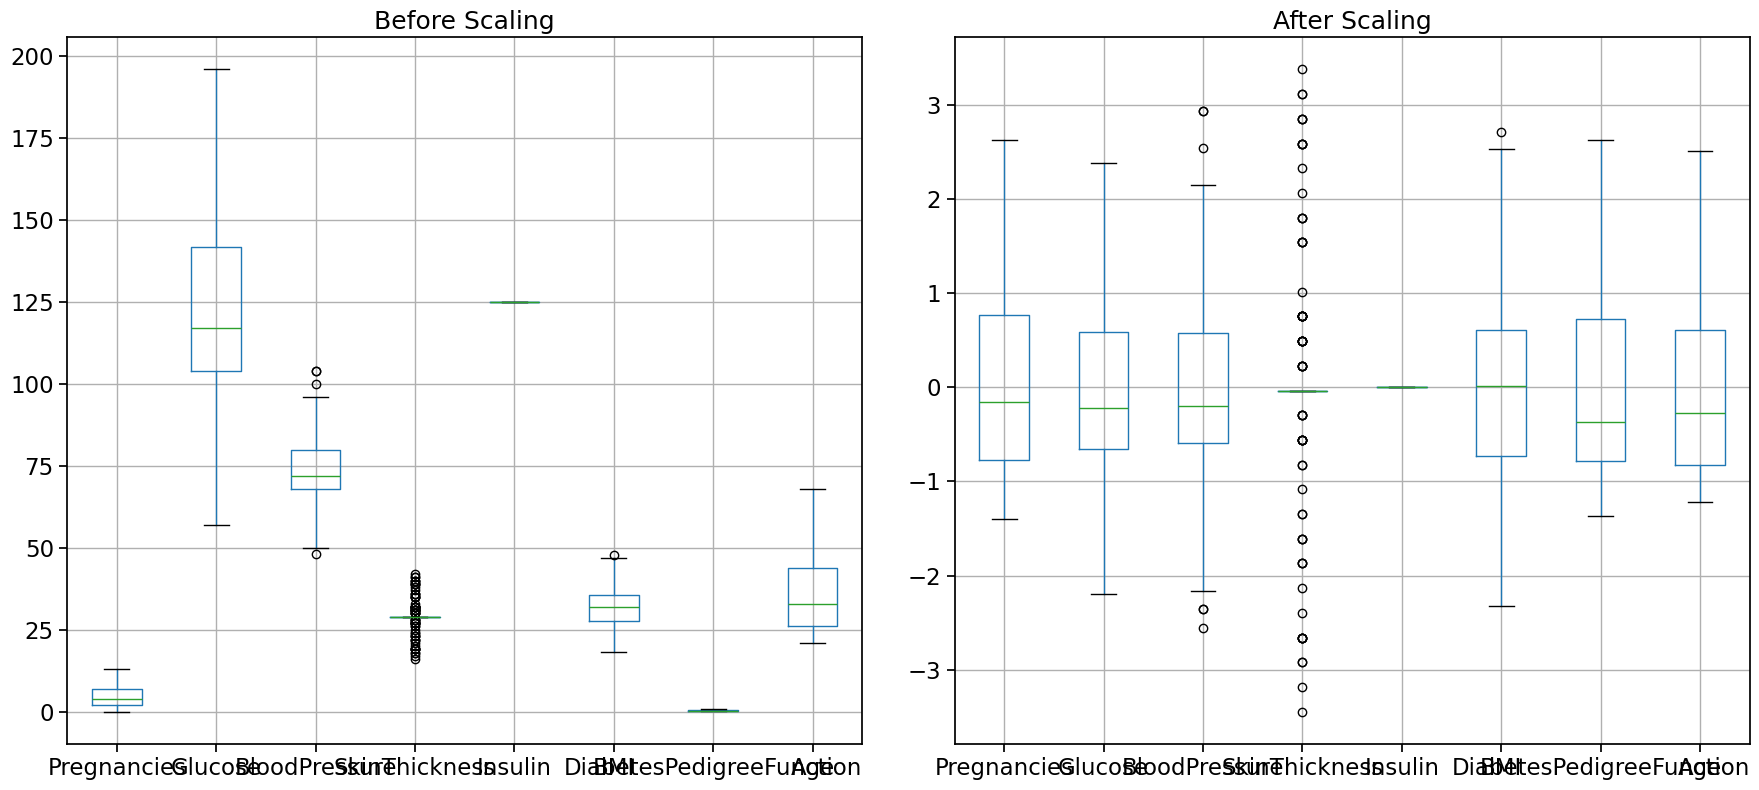

In [ ]:
scaled_data = scale_data(balanced_data, method='standard')
visualize_feature_distribution(balanced_data, scaled_data)

X_train, X_val, X_test, y_train, y_val, y_test = split_data(scaled_data)





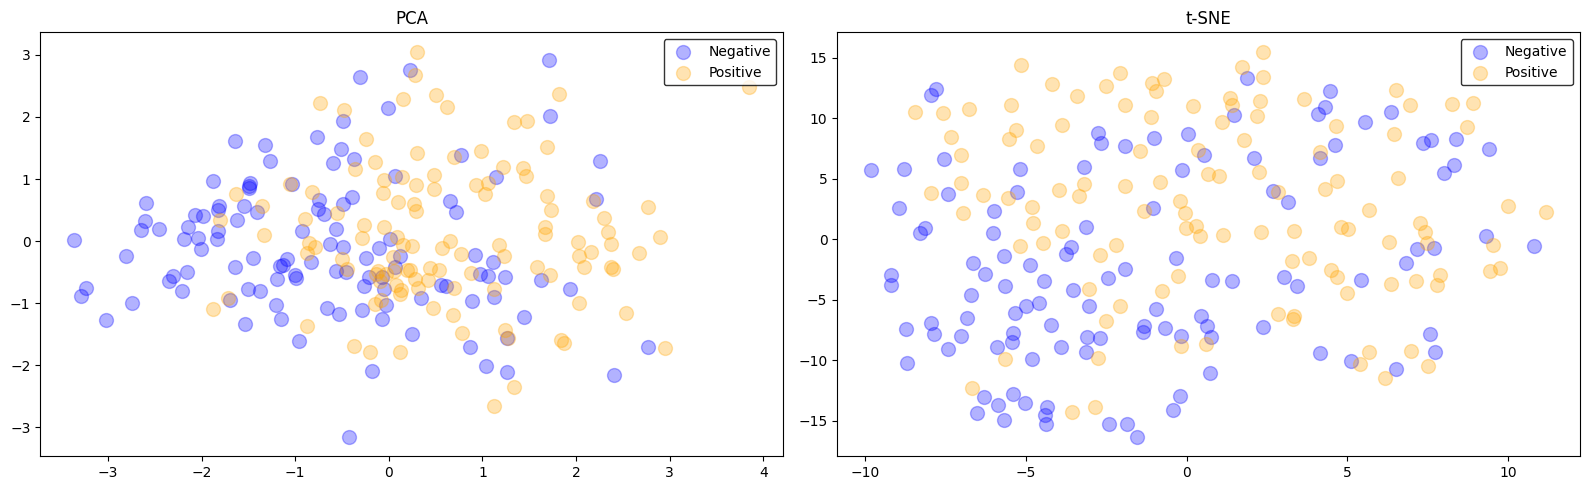

In [ ]:
visualize_2d(scaled_data)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


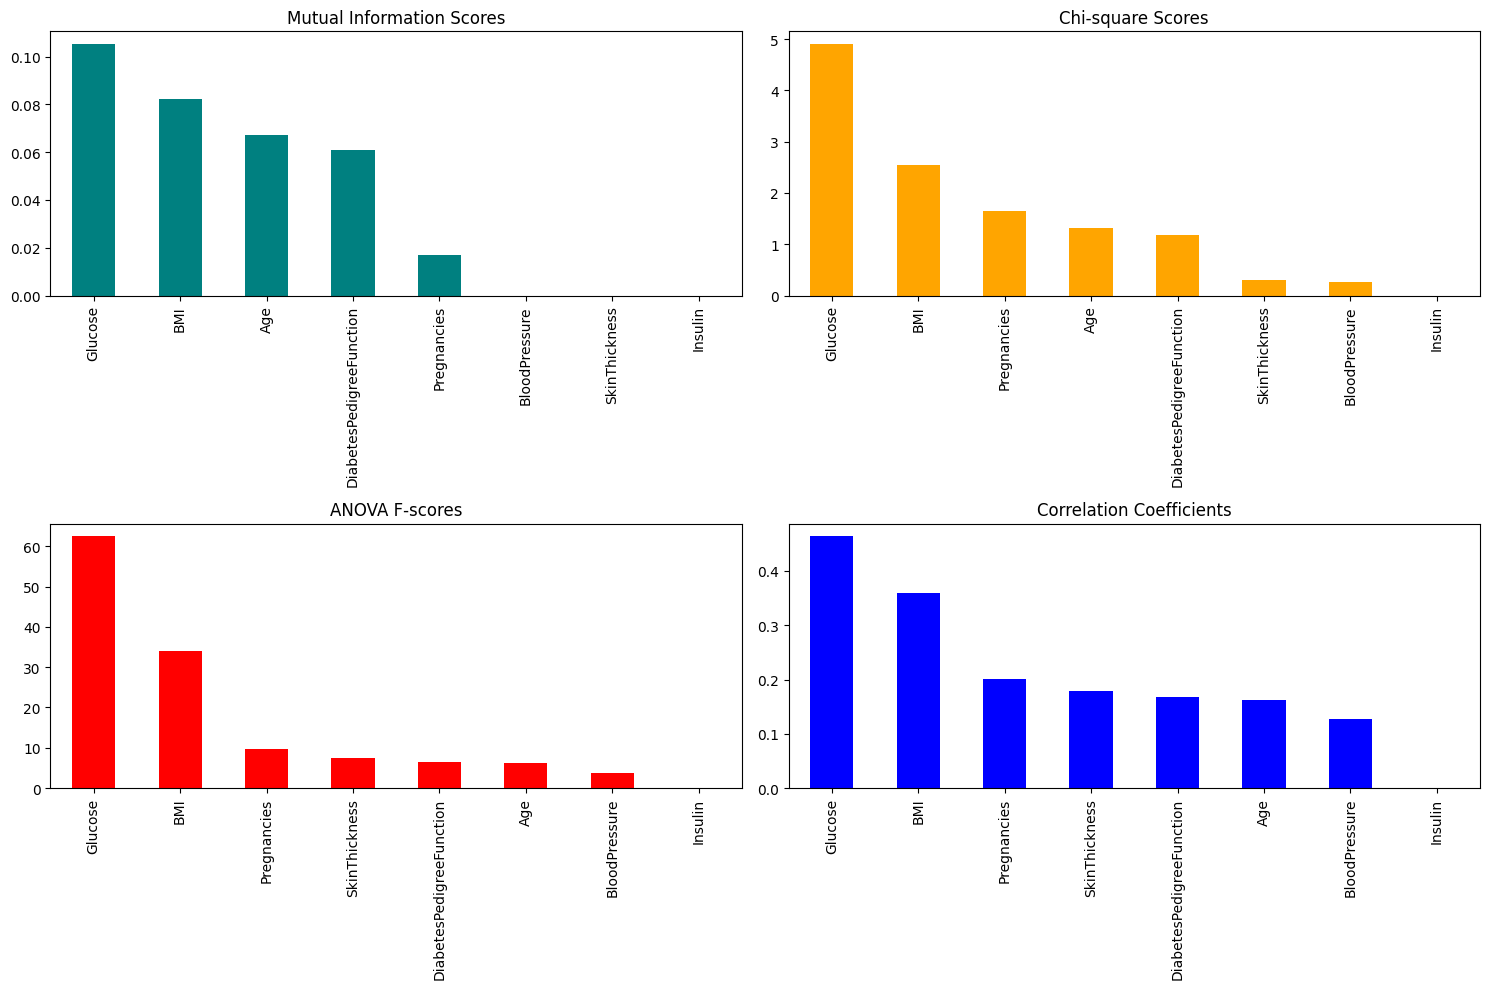

Features selected by variance threshold: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age']


In [ ]:
feature_scores = feature_selection_analysis(balanced_data)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5312 - loss: 0.6788

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.5374 - loss: 0.6824 - val_accuracy: 0.7391 - val_loss: 0.6401
Epoch 2/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5312 - loss: 0.7155

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5704 - loss: 0.6808 - val_accuracy: 0.6957 - val_loss: 0.6373
Epoch 3/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6562 - loss: 0.6228

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6307 - loss: 0.6434 - val_accuracy: 0.7391 - val_loss: 0.6335
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5577 - loss: 0.7236 - val_accuracy: 0.8261 - val_loss: 0.6359
Epoch 5/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7188 - loss: 0.6142

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6249 - loss: 0.6525 - val_accuracy: 0.8696 - val_loss: 0.6330
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5508 - loss: 0.6800 - val_accuracy: 0.9130 - val_loss: 0.6359
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5695 - loss: 0.6559 - val_accuracy: 0.9130 - val_loss: 0.6362
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5745 - loss: 0.6576 - val_accuracy: 0.9130 - val_loss: 0.6362
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5981 - loss: 0.6990 - val_accuracy: 0.7826 - val_loss: 0.6365
Epoch 10/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4375 - loss: 0.7132

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5782 - loss: 0.6697 - val_accuracy: 0.7826 - val_loss: 0.6329
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5952 - loss: 0.6695 - val_accuracy: 0.7391 - val_loss: 0.6334
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5835 - loss: 0.6741 - val_accuracy: 0.7391 - val_loss: 0.6372
Epoch 13/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5312 - loss: 0.7050

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6060 - loss: 0.6588 - val_accuracy: 0.7391 - val_loss: 0.6321
Epoch 14/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6875 - loss: 0.6563

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6690 - loss: 0.6474 - val_accuracy: 0.7391 - val_loss: 0.6292
Epoch 15/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7812 - loss: 0.6725

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6642 - loss: 0.6645 - val_accuracy: 0.7391 - val_loss: 0.6265
Epoch 16/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.5938 - loss: 0.6593

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5787 - loss: 0.6783 - val_accuracy: 0.7391 - val_loss: 0.6258
Epoch 17/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6562 - loss: 0.6213

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6617 - loss: 0.6284 - val_accuracy: 0.7391 - val_loss: 0.6227
Epoch 18/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.6562 - loss: 0.6404

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6206 - loss: 0.6524 - val_accuracy: 0.7391 - val_loss: 0.6173
Epoch 19/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6250 - loss: 0.6614

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6356 - loss: 0.6420 - val_accuracy: 0.7391 - val_loss: 0.6138
Epoch 20/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6875 - loss: 0.6385

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6098 - loss: 0.6531 - val_accuracy: 0.6957 - val_loss: 0.6093
Epoch 21/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5912 - loss: 0.6787 - val_accuracy: 0.7391 - val_loss: 0.6165
Epoch 22/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6338 - loss: 0.6465 - val_accuracy: 0.7391 - val_loss: 0.6164
Epoch 23/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5939 - loss: 0.6494 - val_accuracy: 0.6957 - val_loss: 0.6131
Epoch 24/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.5795

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6758 - loss: 0.6043 - val_accuracy: 0.6957 - val_loss: 0.6091
Epoch 25/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7812 - loss: 0.5912

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7054 - loss: 0.6111 - val_accuracy: 0.6957 - val_loss: 0.6047
Epoch 26/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7188 - loss: 0.6384

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6808 - loss: 0.6276 - val_accuracy: 0.6957 - val_loss: 0.6020
Epoch 27/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6962 - loss: 0.6359 - val_accuracy: 0.6957 - val_loss: 0.6030
Epoch 28/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6856 - loss: 0.6215 - val_accuracy: 0.6957 - val_loss: 0.6032
Epoch 29/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9375 - loss: 0.5487

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7210 - loss: 0.5978 - val_accuracy: 0.7391 - val_loss: 0.5991
Epoch 30/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8125 - loss: 0.5388

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7083 - loss: 0.6004 - val_accuracy: 0.7391 - val_loss: 0.5954
Epoch 31/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5312 - loss: 0.6600

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6203 - loss: 0.6455 - val_accuracy: 0.7391 - val_loss: 0.5924
Epoch 32/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.7500 - loss: 0.5778

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7152 - loss: 0.5921 - val_accuracy: 0.7391 - val_loss: 0.5885
Epoch 33/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6261 - loss: 0.6234 - val_accuracy: 0.6957 - val_loss: 0.5899
Epoch 34/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6875 - loss: 0.5888

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6999 - loss: 0.6003 - val_accuracy: 0.7391 - val_loss: 0.5827
Epoch 35/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6562 - loss: 0.6246

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6803 - loss: 0.6232 - val_accuracy: 0.6957 - val_loss: 0.5816
Epoch 36/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6753 - loss: 0.6411 - val_accuracy: 0.6957 - val_loss: 0.5876
Epoch 37/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6796 - loss: 0.6328 - val_accuracy: 0.6957 - val_loss: 0.5907
Epoch 38/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7325 - loss: 0.5915 - val_accuracy: 0.6957 - val_loss: 0.5873
Epoch 39/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6768 - loss: 0.5890 - val_accuracy: 0.6957 - val_loss: 0.5819
Epoch 40/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7500 - loss: 0.6494

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7011 - loss: 0.6155 - val_accuracy: 0.7391 - val_loss: 0.5784
Epoch 41/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7500 - loss: 0.5432

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7129 - loss: 0.5772 - val_accuracy: 0.7391 - val_loss: 0.5783
Epoch 42/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 0.6085

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6952 - loss: 0.6161 - val_accuracy: 0.7391 - val_loss: 0.5764
Epoch 43/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6875 - loss: 0.6940

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7205 - loss: 0.6237 - val_accuracy: 0.7391 - val_loss: 0.5735
Epoch 44/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6749 - loss: 0.6007 - val_accuracy: 0.7391 - val_loss: 0.5741
Epoch 45/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7188 - loss: 0.5803

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6835 - loss: 0.5753 - val_accuracy: 0.7391 - val_loss: 0.5674
Epoch 46/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6988 - loss: 0.6069 - val_accuracy: 0.7391 - val_loss: 0.5685
Epoch 47/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6746 - loss: 0.5939 - val_accuracy: 0.7391 - val_loss: 0.5703
Epoch 48/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6713 - loss: 0.6222 - val_accuracy: 0.7391 - val_loss: 0.5683
Epoch 49/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6711 - loss: 0.6050 - val_accuracy: 0.7391 - val_loss: 0.5675
Epoch 50/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6813 - loss: 0.5949 - val_accuracy: 0.7391 - val_loss: 0.5684
Epoch 51/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5938 - loss: 0.7588

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6770 - loss: 0.6468 - val_accuracy: 0.7391 - val_loss: 0.5666
Epoch 52/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6250 - loss: 0.8737

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6608 - loss: 0.7042 - val_accuracy: 0.7391 - val_loss: 0.5664
Epoch 53/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6250 - loss: 0.6351

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6409 - loss: 0.6394 - val_accuracy: 0.7391 - val_loss: 0.5637
Epoch 54/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7054 - loss: 0.5824 - val_accuracy: 0.7391 - val_loss: 0.5649
Epoch 55/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6484 - loss: 0.6363 - val_accuracy: 0.7391 - val_loss: 0.5663
Epoch 56/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7141 - loss: 0.6066 - val_accuracy: 0.7391 - val_loss: 0.5688
Epoch 57/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6623 - loss: 0.6421 - val_accuracy: 0.7391 - val_loss: 0.5664
Epoch 58/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7213 - loss: 0.5834 - val_accuracy: 0.7391 - val_loss: 0.5657
Epoch 59/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6834 - loss: 0.5955 - val_accuracy: 0.7391 - val_loss: 0.5644
Epoch 60/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7812 - loss: 0.5326

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7299 - loss: 0.5691 - val_accuracy: 0.7391 - val_loss: 0.5637
Epoch 61/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7190 - loss: 0.5966 - val_accuracy: 0.7391 - val_loss: 0.5705
Epoch 62/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6641 - loss: 0.6411 - val_accuracy: 0.7391 - val_loss: 0.5722
Epoch 63/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6473 - loss: 0.6008 - val_accuracy: 0.7391 - val_loss: 0.5723
Epoch 64/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7472 - loss: 0.5739 - val_accuracy: 0.7391 - val_loss: 0.5691
Epoch 65/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6807 - loss: 0.5907 - val_accuracy: 0.7391 - val_loss: 0.5645
Epoch 66/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6893 - loss: 0.6311 - val_accuracy: 0.7391 - val_loss: 0.5657
Epoch 67/100
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7812 - loss: 0.5558

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7201 - loss: 0.5765 - val_accuracy: 0.6957 - val_loss: 0.5569
Epoch 68/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6844 - loss: 0.5976 - val_accuracy: 0.6957 - val_loss: 0.5619
Epoch 69/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7015 - loss: 0.6154 - val_accuracy: 0.7391 - val_loss: 0.5633
Epoch 70/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7838 - loss: 0.5810 - val_accuracy: 0.6957 - val_loss: 0.5709
Epoch 71/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7075 - loss: 0.5721 - val_accuracy: 0.6957 - val_loss: 0.5672
Epoch 72/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6850 - loss: 0.6120 - val_accuracy: 0.6957 - val_loss: 0.5674
Epoch 73/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7240 - loss: 0.5774 - val_accuracy: 0.6957 - val_loss: 0.5652
Epoch 74/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6569 - loss: 0.6044 - val_accuracy: 0.6957 - val_loss: 0.56

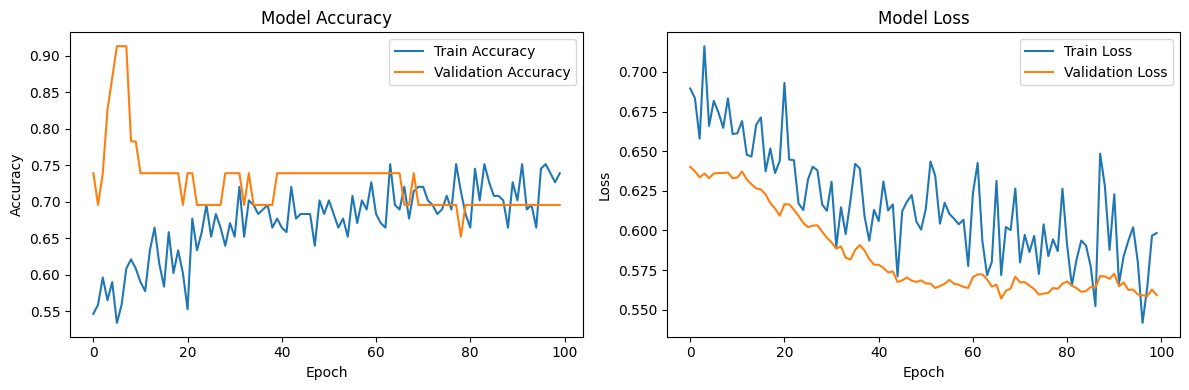

In [ ]:
model = build_model(input_shape=(X_train.shape[1],), num_classes=2)
history = train_model(model, X_train, y_train, X_val, y_val, epochs=100)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Test Accuracy: 71.74%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.61      0.68        23
    Positive       0.68      0.83      0.75        23

    accuracy                           0.72        46
   macro avg       0.73      0.72      0.71        46
weighted avg       0.73      0.72      0.71        46



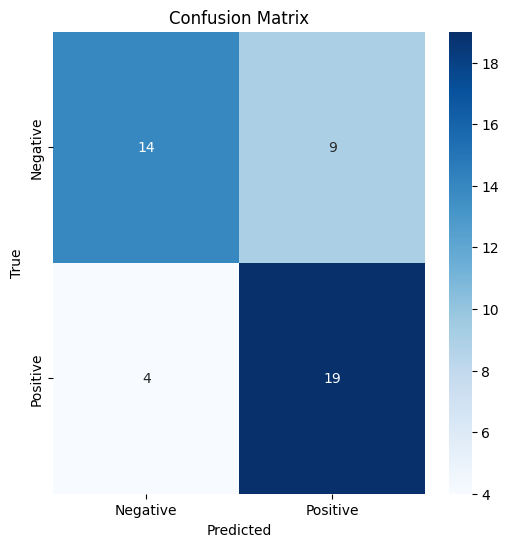

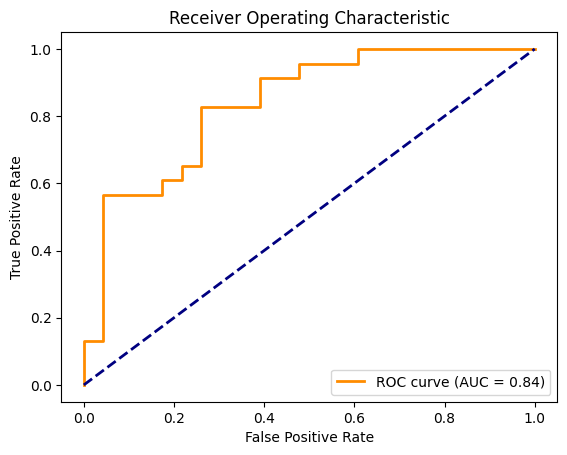

In [ ]:

test_accuracy = evaluate_model(model, X_test, y_test)

# LIME

In [ ]:
pip install lime

In [ ]:
import lime
import lime.lime_tabular

def explain_with_lime(model, X_train, instance):
    explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=X_train.columns,
        class_names=['No Diabetes', 'Diabetes'],
        mode='classification'
    )
    exp = explainer.explain_instance(
        instance.values,
        model.predict,
        num_features=5
    )
    return exp.show_in_notebook()

In [ ]:
sample_negative = X_test[y_test[:, 0] == 1].iloc[0]
sample_positive = X_test[y_test[:, 1] == 1].iloc[0]
sample_uncertain = X_test.iloc[np.argmin(np.max(model.predict(X_test), axis=0))]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [ ]:
print("LIME  for a Negative Case:")
explain_with_lime(model, X_train, sample_negative)

LIME  for a Negative Case:
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print("LIME for a Positive Case:")
explain_with_lime(model, X_train, sample_positive)

LIME for a Positive Case:
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print("LIME  for an Uncertain Case:")
explain_with_lime(model, X_train, sample_uncertain)

LIME  for an Uncertain Case:
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# SHAP

  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-117-f4a0d57b3a54>:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, test_samples,


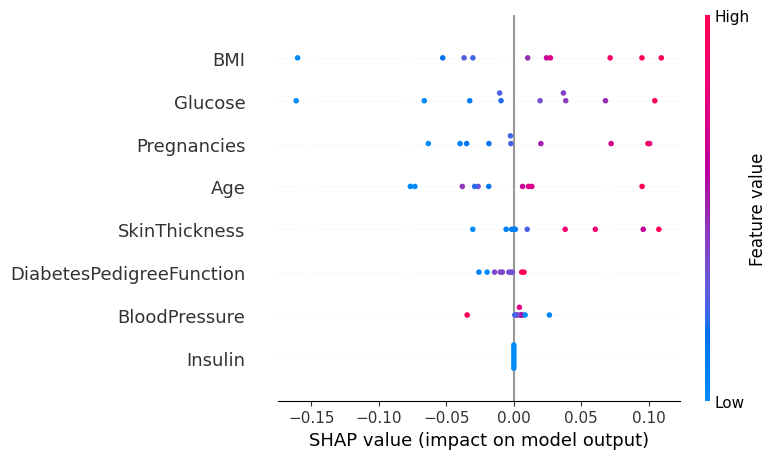

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

def shap_explanation(model, X_train, X_test):

    background = X_train.values[:50]
    test_samples = X_test.values[:10]

    explainer = shap.KernelExplainer(
        lambda x: model.predict(x, verbose=0)[:,1],
        background
    )

    shap_values = explainer.shap_values(test_samples)

    shap.summary_plot(shap_values, test_samples,
                     feature_names=X_test.columns.tolist(),
                     show=False)
    plt.tight_layout()
    plt.show()

shap_explanation(model, X_train, X_test)

# PDP plot

In [ ]:
top_features = feature_scores['mutual_info'].index[:3].tolist()
print("Top features selected:", top_features)


Top features selected: ['Glucose', 'BMI', 'Age']


Processing Age: 100%|██████████| 50/50 [00:06<00:00,  8.17it/s]


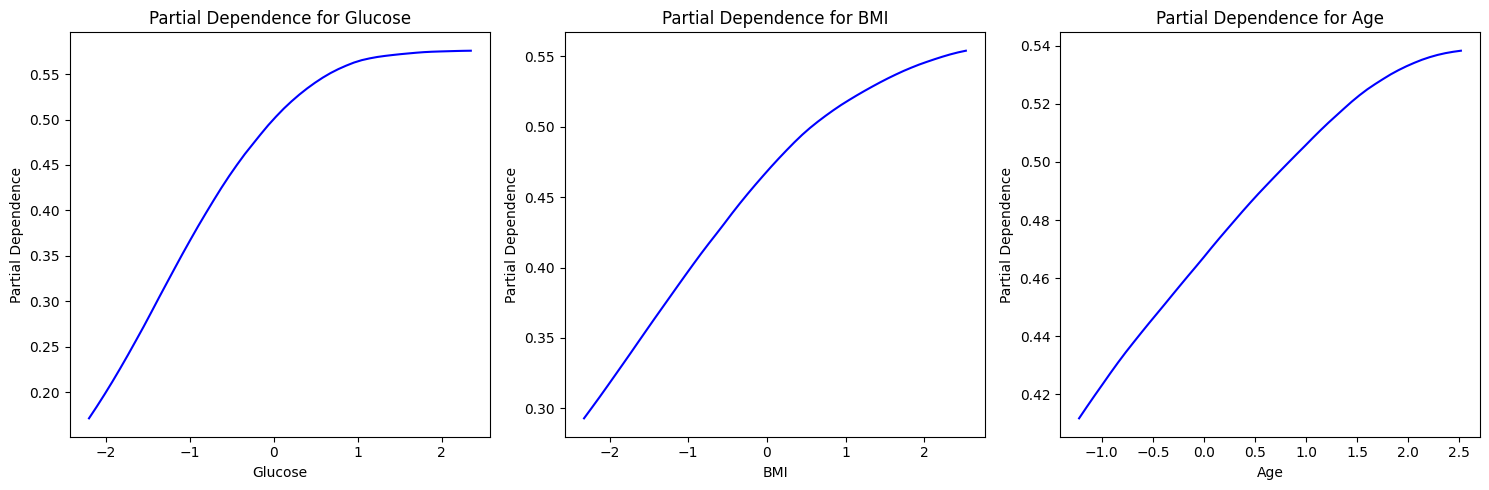

In [ ]:
from tqdm import tqdm

def pdp_plot(model, X, features, grid_resolution=50):

    fig, axes = plt.subplots(nrows=1, ncols=len(features),
                          figsize=(15, 5))
    if len(features) == 1:
        axes = [axes]

    for i, feature in enumerate(features):
        grid = np.linspace(X[feature].min(), X[feature].max(), grid_resolution)
        preds = np.zeros((grid_resolution,))
        for j, value in enumerate(tqdm(grid, desc=f"Processing {feature}")):
            X_temp = X.copy()
            X_temp[feature] = value

            preds[j] = model.predict(X_temp.values, verbose=0)[:, 1].mean()

        axes[i].plot(grid, preds, 'b-')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Partial Dependence')
        axes[i].set_title(f'Partial Dependence for {feature}')

    plt.tight_layout()
    plt.show()
top_features = ['Glucose', 'BMI', 'Age']


pdp_plot(model, X_train, top_features)

# Global Surrogate Model

In [ ]:
y_train_preds = model.predict(X_train)
y_train_preds_classes = np.argmax(y_train_preds, axis=1)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

surrogate = DecisionTreeClassifier(max_depth=4, random_state=42)
surrogate.fit(X_train, y_train_preds_classes)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_surrogate_preds = surrogate.predict(X_train)
fidelity = accuracy_score(y_train_preds_classes, y_surrogate_preds)
print(f"Fidelity of surrogate model: {fidelity:.2f}")


Fidelity of surrogate model: 0.97


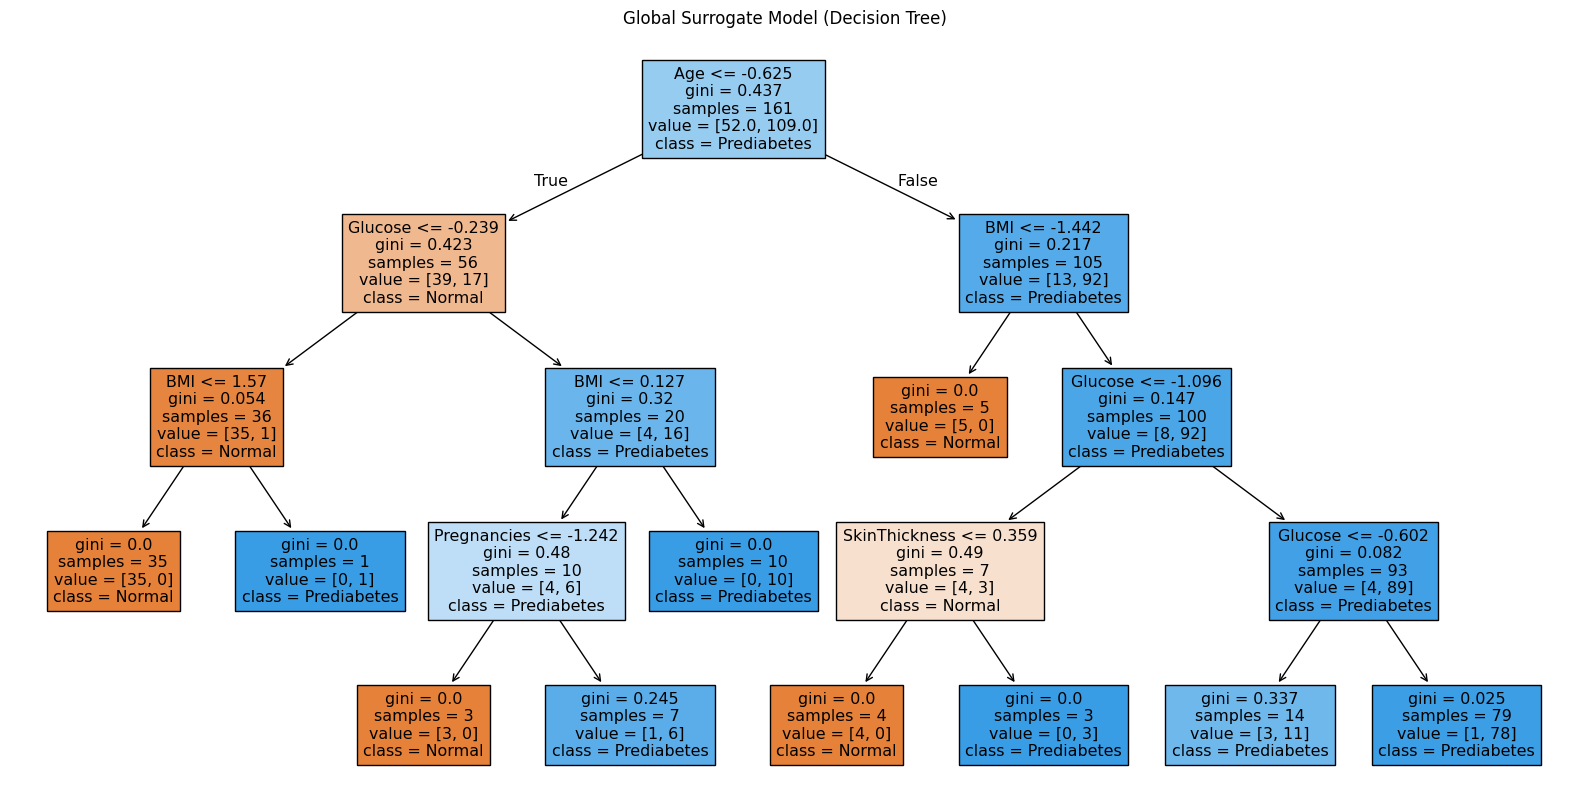

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(surrogate, feature_names=X_train.columns, class_names=['Normal', 'Prediabetes', 'Diabetes'], filled=True)
plt.title("Global Surrogate Model (Decision Tree)")
plt.show()
